# Demo of using NMF for Mouse Brain ISH data

In [1]:
import numpy as np
import sklearn
from nmf_with_missing_values import nmf_with_missing_values
# import ipyvolume
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt



## load the data

In [2]:
tmp = np.load('../../data/mouse_brain_ISH_float32.npz')
data = tmp['data']
sections = tmp['sections'].item()
original_shape = data.shape
d = data.shape[1] * data.shape[2] * data.shape[3]
data = np.reshape(data, (data.shape[0], d))

## calculate nmf (could be quite long, do not run this chunk if you have the intermediate result

In [3]:
# n_components = 18 # top candidates: 14, 18
# nmf = nmf_with_missing_values(n_outer_loops = 2, n_components = n_components) 
# D = nmf.fit_transform(data)
# A = nmf.components_
# X_guess = nmf.X_guess
# np.savez('nmf_result_ncomp_'+str(n_components)+'.npz', D = D, A = A, X_guess = X_guess, data = data, original_shape = original_shape)

## load the intermediate result 

In [4]:
f = np.load('nmf_result_ncomp_18.npz')
A = f['A']
original_shape = f['original_shape']
X_guess = f['X_guess']
D = f['D']

## see the imputing effect

In [5]:
def make_cube(p1):
    ''' make X a cube
    '''
    max_dim = np.max(p1.shape)
    p2 = np.zeros((max_dim, max_dim, max_dim))
    for i in range(p1.shape[0]):
        for j in range(p1.shape[1]):
            for k in range(p1.shape[2]):
                p2[i,j,k] = max(p1[i,j,k],0)
    return p2

In [6]:
# factor_n = 1
# p1 = np.reshape(X_guess[factor_n,:] - np.maximum(data[factor_n,:],0), original_shape[1:])
# p1 = np.reshape(X_guess[factor_n,:] - np.maximum(data[factor_n,:],0), original_shape[1:])
# p2 = make_cube(p1)
# ipyvolume.figure()
# ipyvolume.volshow(p2, lighting=True)
# ipyvolume.show()
# # quickvolshow(p2)

## visualize the pattern

the index of the gene Glra1 is 1707


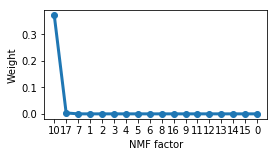

In [30]:
target_gene = 'Glra1' # the name of a gene to be investigated.

gene_ids = np.array(list(sections.keys())) 

# find the gene_id of the target gene
gene_id_targets = [x for x, name in sections.items() if name == target_gene]
gene_id_target = 0 
for gene_id in sections:    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if sections[gene_id] == target_gene:
        gene_id_target = gene_id
        
        
# find the gene index
gene_ind = np.where(gene_ids == gene_id_target)[0][0]
print("the index of the gene {} is {}".format(target_gene, gene_ind))


# sort loadings of the gene from top to bottom
top_factor = np.argsort(D[gene_ind,:])[::-1]


plt.figure(figsize=(4,2))
plt.plot(D[gene_ind,top_factor],'o-',lw=3)
plt.xticks(range(D.shape[1]),top_factor)
plt.xlabel('NMF factor')
plt.ylabel('Weight')
plt.show()

# for i in top_factor[:2]:
#     p1 = np.reshape(A[i,:], original_shape[1:])
#     p1 = np.flip(p1,axis=1)
#     p1 = np.swapaxes(p1,0,2)
#     p2 = make_cube(p1)
#     ipyvolume.figure()
#     ipyvolume.volshow(p2, lighting=True)
# #     ipyvolume.pylab.view(azimuth=450, elevation=None, distance=None)
#     ipyvolume.show()

# 2D plots

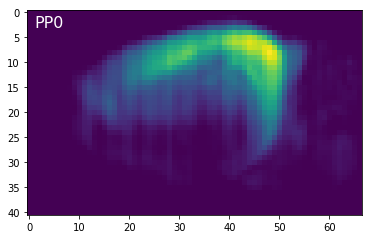

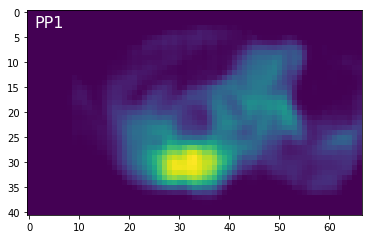

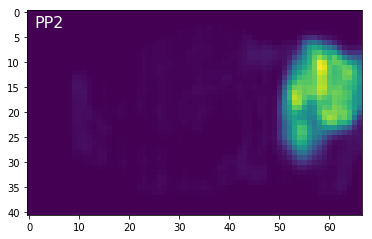

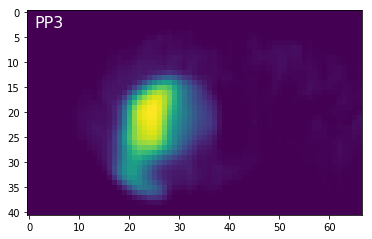

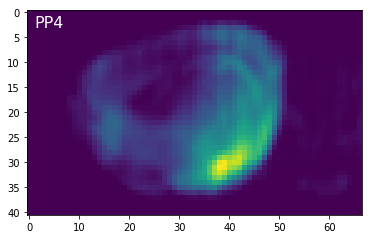

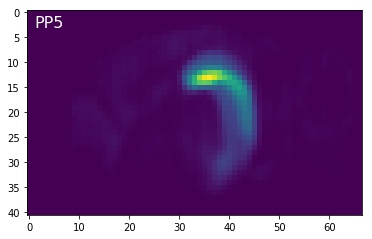

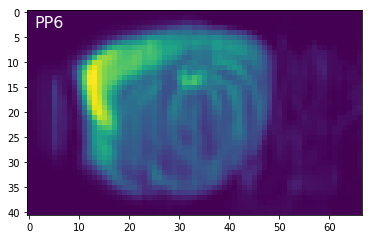

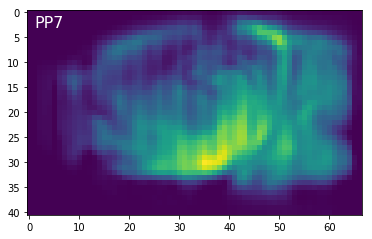

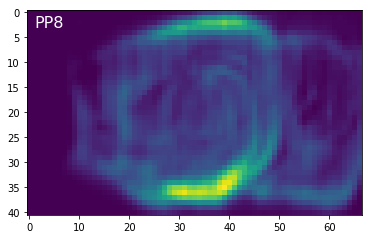

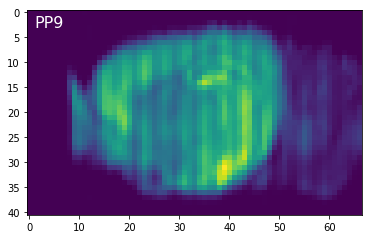

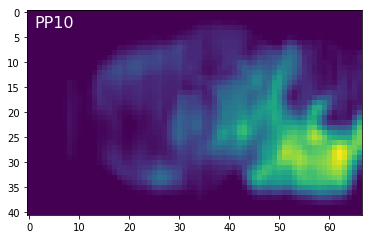

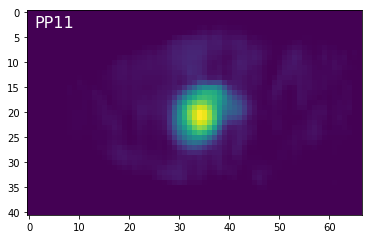

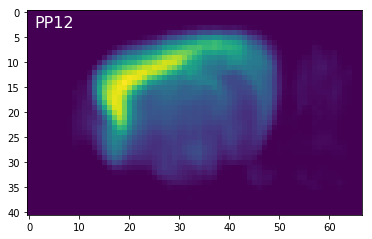

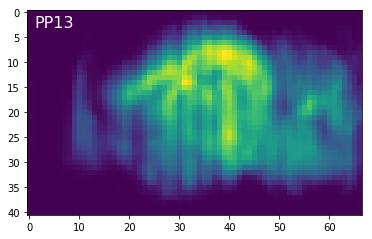

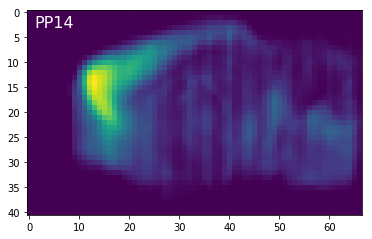

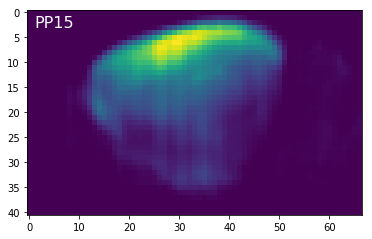

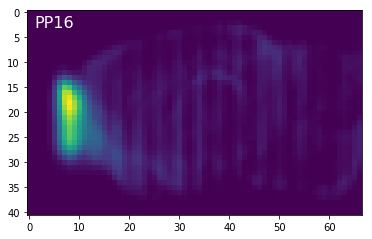

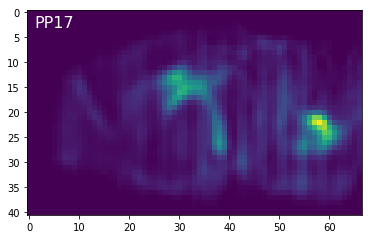

In [234]:
factors = np.zeros((18, 67, 41, 58))

for i in range(A.shape[0]):
    p2 = np.reshape(A[i,:], original_shape[1:])
    plt.imshow(np.mean(p2,axis=2).T)
#     plt.axis('off')
    plt.text(1,3,'PP'+str(i),fontsize=16, color='w')
    plt.show()
    factors[i,:,:,:] = p2

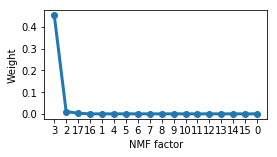

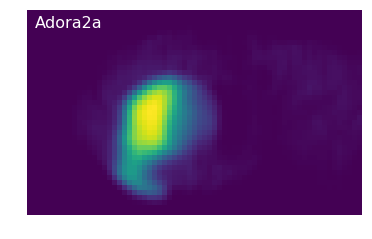

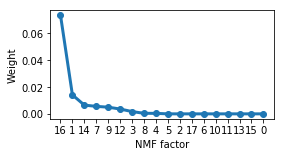

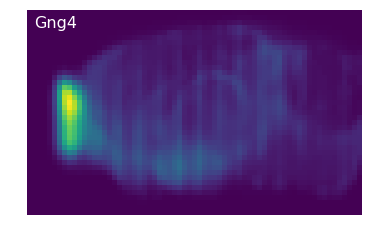

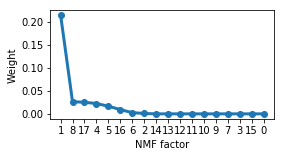

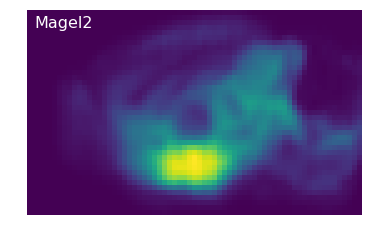

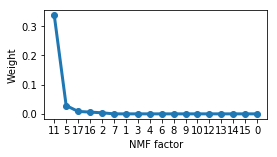

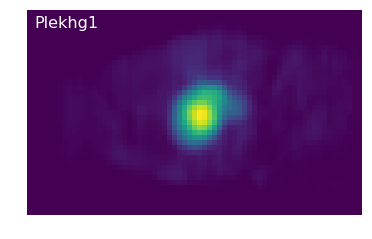

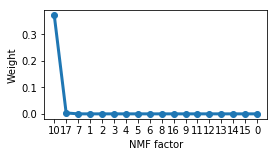

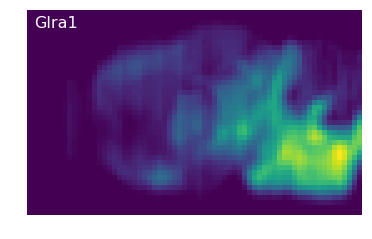

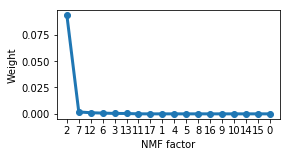

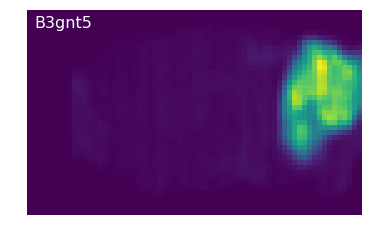

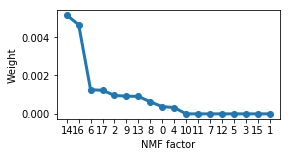

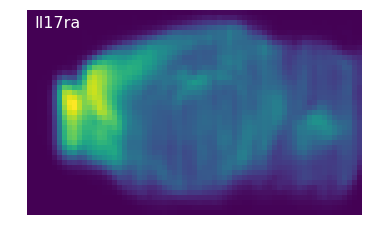

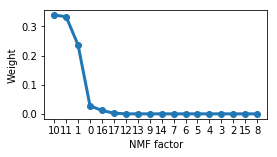

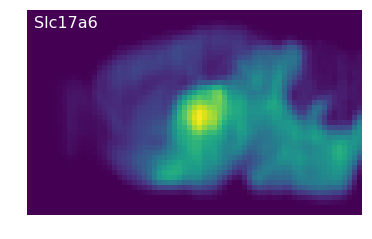

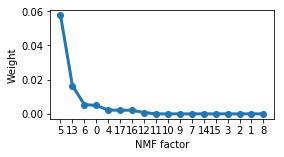

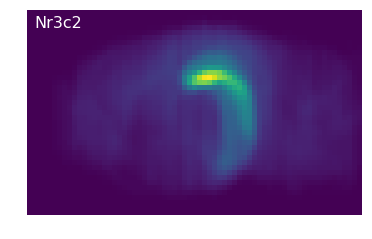

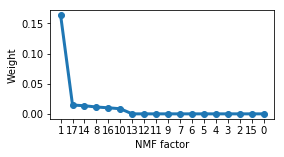

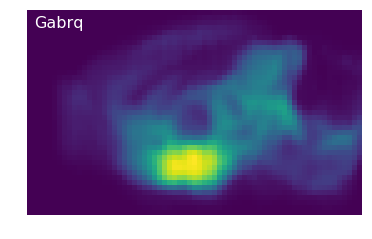

In [43]:
target_genes = ['Adora2a','Gng4','Magel2','Plekhg1','Glra1','B3gnt5','Il17ra','Slc17a6','Nr3c2','Gabrq']

for target_gene in target_genes:
    gene_ids = np.array(list(sections.keys())) 

    # find the gene_id of the target gene
    gene_id_targets = [x for x, name in sections.items() if name == target_gene]
    gene_id_target = 0 
    for gene_id in sections:    # for name, age in dictionary.iteritems():  (for Python 2.x)
        if sections[gene_id] == target_gene:
            gene_id_target = gene_id


    # find the gene index
    gene_ind = np.where(gene_ids == gene_id_target)[0][0]
    #print("the index of the gene {} is {}".format(target_gene, gene_ind))


    # sort loadings of the gene from top to bottom
    top_factor = np.argsort(D[gene_ind,:])[::-1]
    plt.figure(figsize=(4,2))
    plt.plot(np.sort(D[gene_ind,:])[::-1],'o-',lw=3)
    plt.xticks(range(D.shape[1]),top_factor)
    plt.xlabel('NMF factor')
    plt.ylabel('Weight')
    plt.show()

    p2 = np.reshape(np.matmul(D[gene_ind,:],A), original_shape[1:])   
    plt.imshow(np.mean(p2,axis=2).T)
    plt.axis('off')
    plt.text(1,3,target_gene,fontsize=16, color='w')
    plt.show()


In [7]:
import pandas as pd
areas_atlas = np.load('mouse_coarse_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_coarse_df')

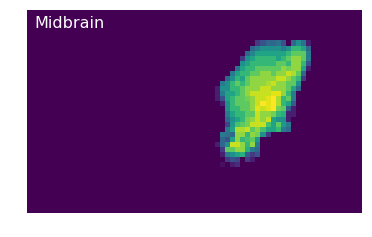

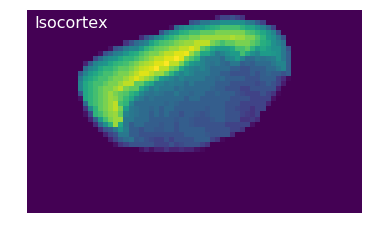

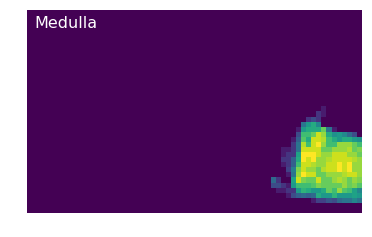

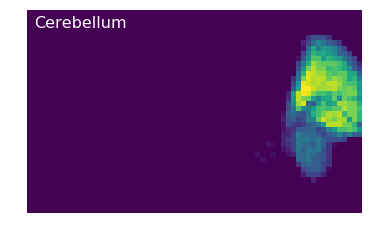

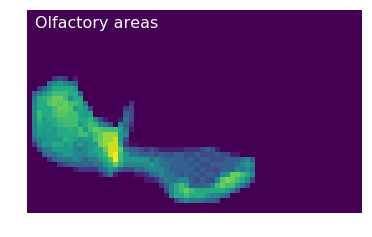

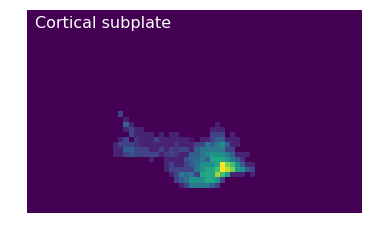

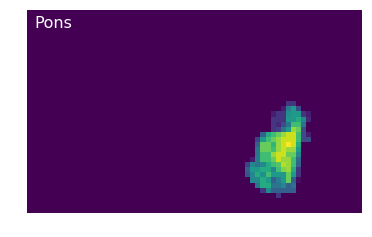

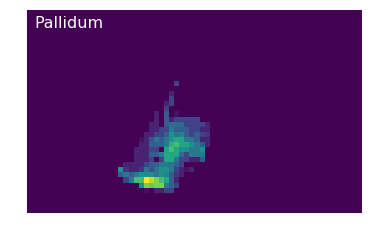

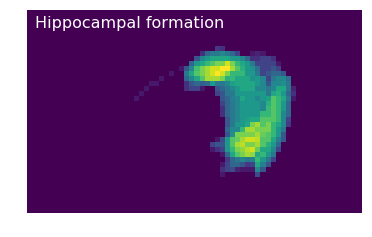

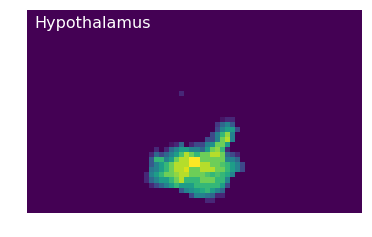

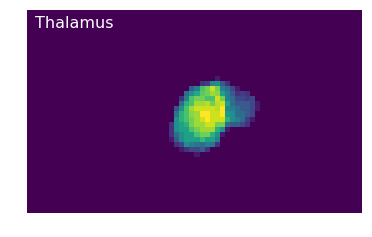

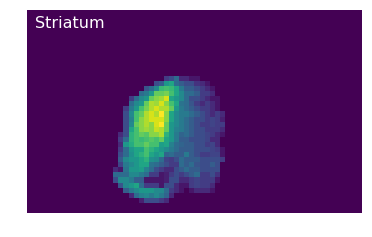

In [8]:
for i in range(12):
    plt.imshow(np.mean(areas_atlas[i,:,:,:],axis=2).T)
    plt.axis('off')
    plt.text(1,3,(mouse_coarse_df.iloc[i]['name']),fontsize=16, color='w')
    plt.show()

In [46]:
cor_mat = np.zeros((12,18))
for i in range(12):
    for j in range(18):
        cor_mat[i,j] = np.corrcoef(areas_atlas.reshape(12,-1)[i,:],factors[:,:-1,:-1,:-1].reshape(18,-1)[j,:])[0,1]

Text(0.5,0,'staNMF Factor')

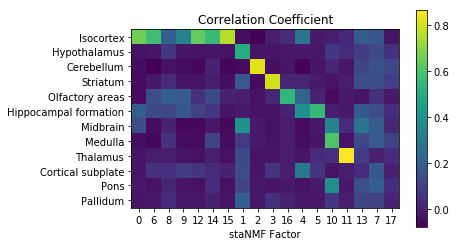

In [47]:
# area_order=[ 1,  9,  3, 11,  8, 6, 2, 10, 0, 4, 5,7]
factor_order = [0,6,8,9,12,14,15,1,2,3,16,4,5,10,11,13,7,17]

area_order=[1,9,3,11,4,8,0,2,10,5,6,7]
# factor_order = [0,6,8,9,12,1,2,3,4,5,7,10,11,13]

plt.imshow(cor_mat[area_order,:][:,factor_order])
plt.yticks(range(12),(mouse_coarse_df.iloc[area_order]['name'].tolist()))
plt.xticks(range(18),factor_order)
plt.colorbar()
plt.title('Correlation Coefficient')
plt.xlabel('staNMF Factor')

In [48]:
areas_atlas = np.load('mouse_areas_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_areas_df')

for i in range(12):
    plt.imshow(np.mean(areas_atlas[i,:,:,:],axis=2).T)
    plt.axis('off')
    plt.text(1,3,(mouse_coarse_df.iloc[i]['name']),fontsize=16, color='w')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'mouse_areas_structure_atlas.npy'

In [15]:
cor_mat = np.zeros((51,18))
for i in range(51):
    for j in range(18):
        cor_mat[i,j] = np.corrcoef(areas_atlas.reshape(51,-1)[i,:],factors[:,:-1,:-1,:-1].reshape(18,-1)[j,:])[0,1]

/home/rezaa/miniconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rezaa/miniconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0.5, 0, 'staNMF Factor')

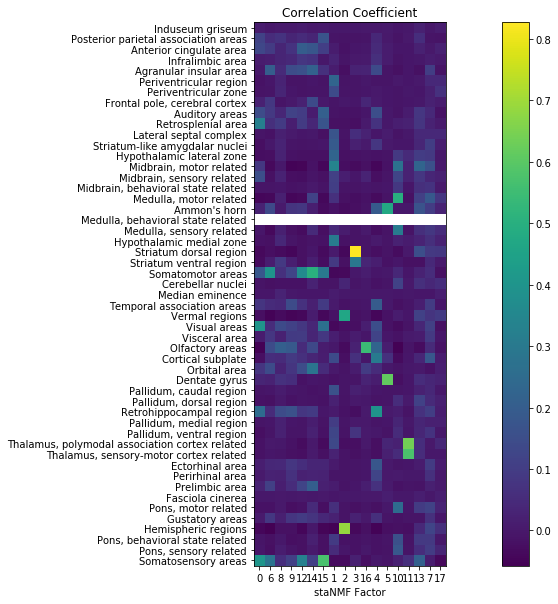

In [17]:
factor_order = [0,6,8,9,12,14,15,1,2,3,16,4,5,10,11,13,7,17]

plt.figure(figsize=(20,10))
plt.imshow(cor_mat[:,factor_order])
plt.yticks(range(51),(mouse_coarse_df['name'].tolist()))
plt.xticks(range(18),factor_order)
plt.colorbar()
plt.title('Correlation Coefficient')
plt.xlabel('staNMF Factor')

# K = 14

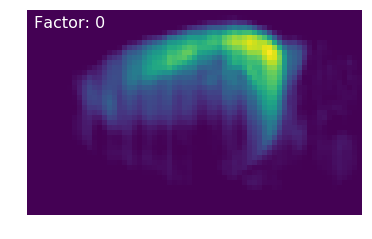

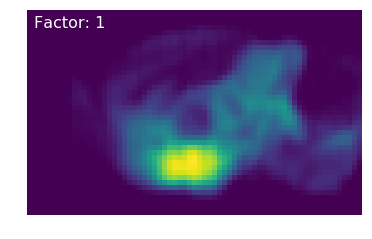

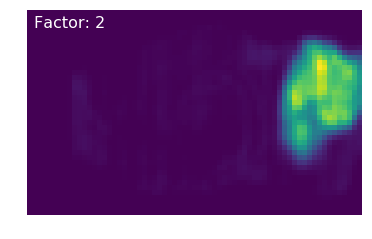

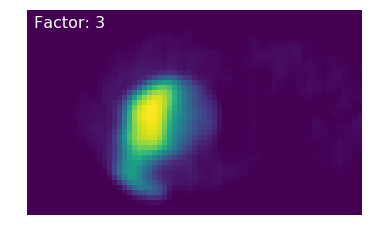

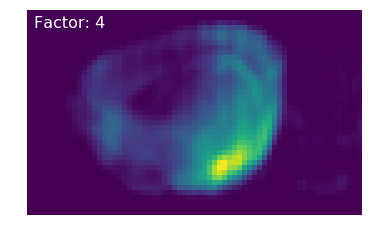

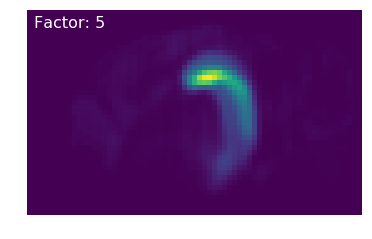

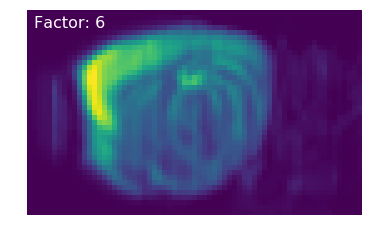

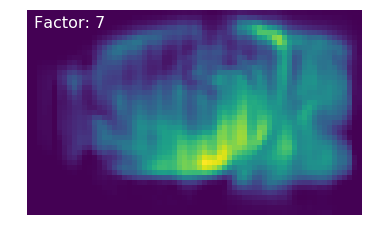

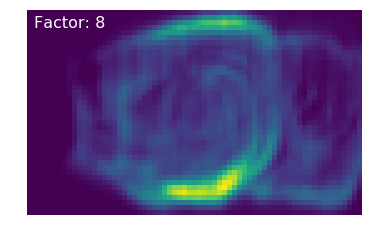

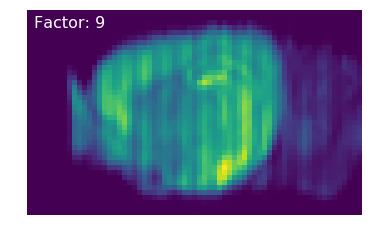

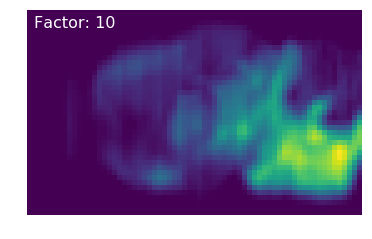

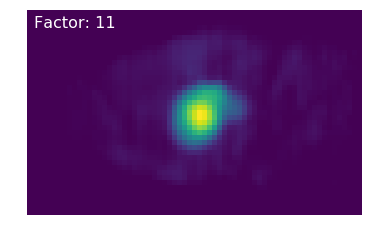

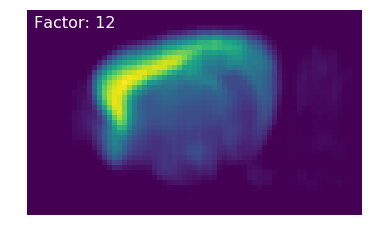

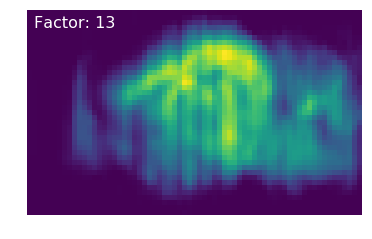

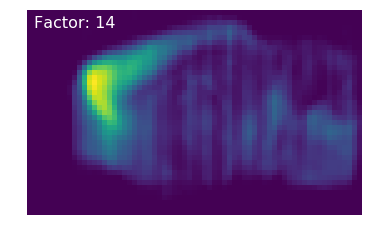

IndexError: index 14 is out of bounds for axis 0 with size 14

In [49]:
factors = np.zeros((14, 67, 41, 58))

for i in range(A.shape[0]):
    p2 = np.reshape(A[i,:], original_shape[1:])
    plt.imshow(np.mean(p2,axis=2).T)
    plt.axis('off')
    plt.text(1,3,'Factor: '+str(i),fontsize=16, color='w')
    plt.show()
    factors[i,:,:,:] = p2

1937


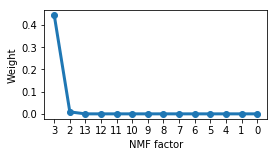

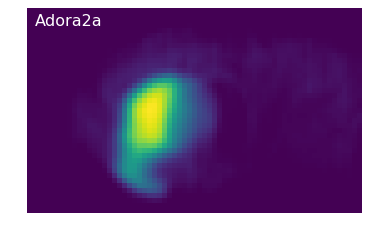

1799


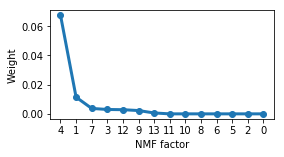

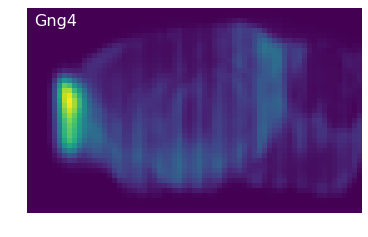

3276


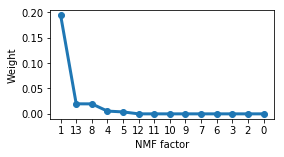

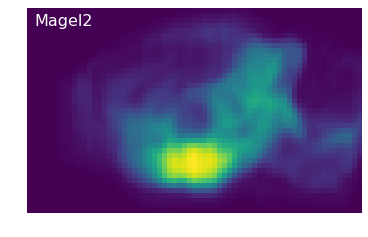

3782


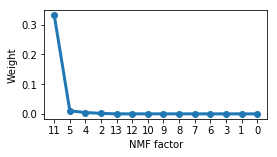

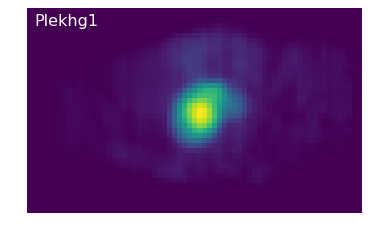

1707


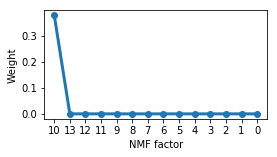

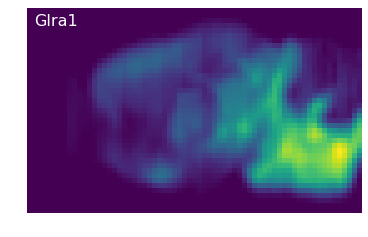

1533


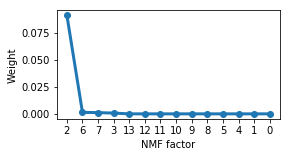

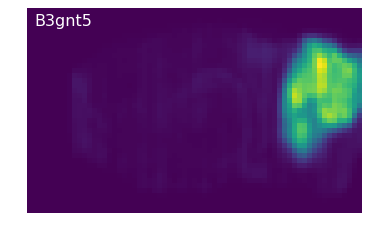

3104


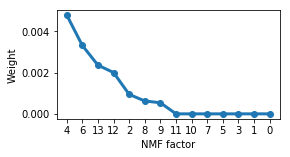

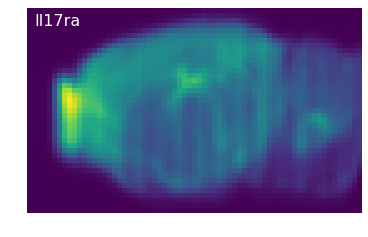

388


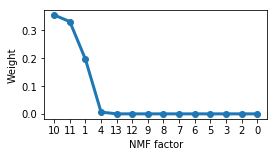

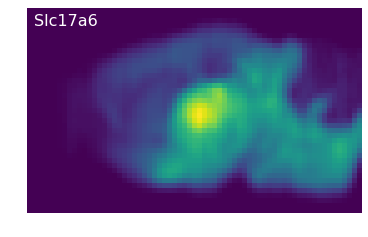

426


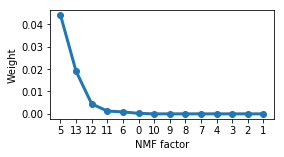

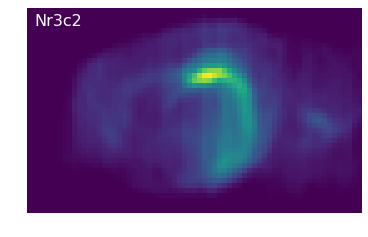

3275


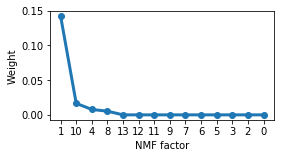

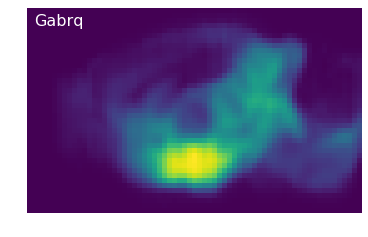

In [22]:
target_genes = ['Adora2a','Gng4','Magel2','Plekhg1','Glra1','B3gnt5','Il17ra','Slc17a6','Nr3c2','Gabrq']

for target_gene in target_genes:
    gene_ids = np.zeros(len(sections.item()))
    for gene_ind, gene_id in enumerate(sections.item()):    # for name, age in dictionary.iteritems():  (for Python 2.x)
        gene_ids[gene_ind] = gene_id

    gene_id_target = 0 
    for gene_id in sections.item():    # for name, age in dictionary.iteritems():  (for Python 2.x)
        if sections.item()[gene_id] == target_gene:
            gene_id_target = gene_id

    gene_ind = np.where(gene_ids == gene_id_target)[0][0]
    print(gene_ind)
    top_factor = np.argsort(D[gene_ind,:])[::-1]

    plt.figure(figsize=(4,2))
    plt.plot(np.sort(D[gene_ind,:])[::-1],'o-',lw=3)
    plt.xticks(range(D.shape[1]),top_factor)
    plt.xlabel('NMF factor')
    plt.ylabel('Weight')
    plt.show()

    p2 = np.reshape(np.matmul(D[gene_ind,:],A), original_shape[1:])   
    plt.imshow(np.mean(p2,axis=2).T)
    plt.axis('off')
    plt.text(1,3,target_gene,fontsize=16, color='w')
    plt.show()



In [10]:
import pandas as pd
areas_atlas = np.load('mouse_coarse_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_coarse_df')

cor_mat = np.zeros((12,14))
for i in range(12):
    for j in range(14):
        cor_mat[i,j] = np.corrcoef(areas_atlas.reshape(12,-1)[i,:],factors[:,:-1,:-1,:-1].reshape(14,-1)[j,:])[0,1]

Text(0.5, 0, 'staNMF Factor')

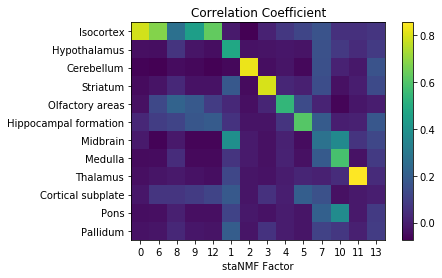

In [17]:
area_order=[1,9,3,11,4,8,0,2,10,5,6,7]
factor_order = [0,6,8,9,12,1,2,3,4,5,7,10,11,13]
plt.imshow(cor_mat[area_order,:][:,factor_order])
plt.yticks(range(12),(mouse_coarse_df.iloc[area_order]['name'].tolist()))
plt.xticks(range(14),factor_order)
plt.colorbar()
plt.title('Correlation Coefficient')
plt.xlabel('staNMF Factor')

In [50]:
import pandas as pd
areas_atlas = np.load('mouse_areas_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_areas_df')

cor_mat = np.zeros((51,14))
for i in range(51):
    for j in range(14):
        cor_mat[i,j] = np.corrcoef(areas_atlas.reshape(51,-1)[i,:],factors[:,:-1,:-1,:-1].reshape(14,-1)[j,:])[0,1]

# area_order=[ 1,  9,  3, 11,  8, 6, 2, 10, 0, 4, 5,7]
factor_order = [0,6,8,9,12,1,2,3,4,5,7,10,11,13]

plt.figure(figsize=(20,10))
plt.imshow(cor_mat[:,factor_order])
plt.yticks(range(51),(mouse_coarse_df['name'].tolist()))
plt.xticks(range(14),factor_order)
plt.colorbar()
plt.title('Correlation Coefficient')
plt.xlabel('staNMF Factor')

FileNotFoundError: [Errno 2] No such file or directory: 'mouse_areas_structure_atlas.npy'

# LASSO analysis

In [16]:
data_correctec = data.copy()
data_correctec[np.where(data_correctec==-1)]=0

(18, 159326)

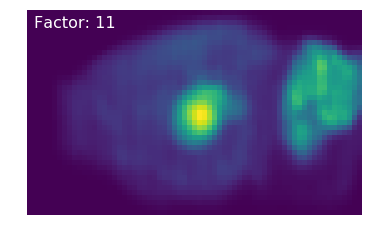

In [23]:
factors = np.zeros((18, 67, 41, 58))

# for i in range(A.shape[0]):
p2 = np.reshape(np.matmul(D[0,:],A), original_shape[1:])
plt.imshow(np.mean(p2,axis=2).T)
plt.axis('off')
plt.text(1,3,'Factor: '+str(i),fontsize=16, color='w')
plt.show()

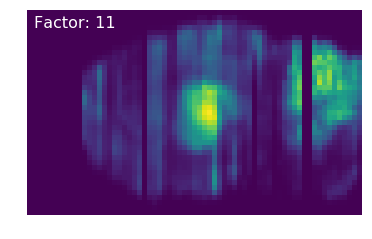

In [48]:
p2 = np.reshape(data_correctec[0,:], original_shape[1:])
plt.imshow(np.mean(p2,axis=2).T)
plt.axis('off')
plt.text(1,3,'Factor: '+str(i),fontsize=16, color='w')
plt.show()

In [127]:
from sklearn.linear_model import LassoCV
from scipy import optimize

In [ ]:
corr_lasso = np.zeros(D.shape[0])
corr_nnls = np.zeros(D.shape[0])
coeffs_lasso = np.zeros((D.shape[0],D.shape[1]))
model_size_nmf = np.zeros(D.shape[0])
model_size_lasso = np.zeros(D.shape[0])



In [51]:
A.shape

(18, 159326)

In [53]:
np.where(D[gene_ind,:]!=0)[0]

array([ 1,  8, 10, 14, 16, 17])

In [177]:
for gene_ind in range(476,D.shape[0]):
    X = A[np.where(D[gene_ind,:]!=0)[0],:].T
    y = data_correctec[gene_ind,:]
    reg = LassoCV(cv=10, random_state=0).fit(X, y)
    if np.sum(reg.coef_)==0:
        print('error, gene_ind:',gene_ind)
        continue
    else:
        corr_lasso[gene_ind] = np.corrcoef(reg.predict(X),y)[0,1]
        coeffs = np.zeros(D.shape[1])
        coeffs[np.where(D[gene_ind,:]!=0)[0]]=reg.coef_
        coeffs_lasso[gene_ind,:] = coeffs
        model_size_lasso[gene_ind] = np.sum(coeffs!=0)
        model_size_nmf[gene_ind] = np.sum(D[gene_ind,:]!=0)

        Xn = A[np.where(coeffs!=0)[0],:].T
        w_nnls = optimize.nnls(Xn,y)
        corr_nnls[gene_ind] = np.corrcoef(np.matmul(Xn,w_nnls[0]),y)[0,1]

error, gene_ind: 477
error, gene_ind: 619
error, gene_ind: 1170


In [178]:
np.savez('lasso_results_18.npz', corr_lasso = corr_lasso, corr_nnls = corr_nnls, model_size_nmf = model_size_nmf, model_size_lasso = model_size_lasso, coeffs_lasso = coeffs_lasso)

In [184]:
print(np.median(corr_lasso))
print(np.median(corr_nnls))
print(np.median(model_size_nmf))
print(np.median(model_size_lasso))

0.7894987894532982
0.7896308953788076
12.0
13.0


# PP based gene catagorization

In [6]:

gene_ids = np.array(list(sections.keys())) 

# find the gene_id of the target gene
gene_id_targets = [x for x, name in sections.items() if name == target_gene]
gene_id_target = 0 
for gene_id in sections:    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if sections[gene_id] == target_gene:
        gene_id_target = gene_id
        
        
# find the gene index
gene_ind = np.where(gene_ids == gene_id_target)[0][0]
print("the index of the gene {} is {}".format(target_gene, gene_ind))


# sort loadings of the gene from top to bottom
top_factor = np.argsort(D[gene_ind,:])[::-1]

(18, 159326)

In [7]:
D.shape

(4345, 18)

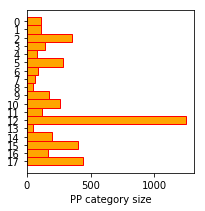

In [154]:
plt.figure(figsize=(3,3))
plt.hist(np.argmax(D,axis=1),bins=np.arange(-.5,18.5,1),facecolor='orange',edgecolor='r',orientation='horizontal')
plt.yticks(np.arange(0,18))
plt.axis='off'
plt.gca().invert_yaxis()
plt.xlabel('PP category size')
plt.show()


In [151]:
gene_inds = []
for pp_ind in range(D.shape[1]):
    gene_per_pp = np.where(np.argmax(D,axis=1)==pp_ind)[0]
    gene_inds = np.concatenate((gene_inds, gene_per_pp))
gene_inds = gene_inds.astype(int)
D_sorted = D[gene_inds,:]

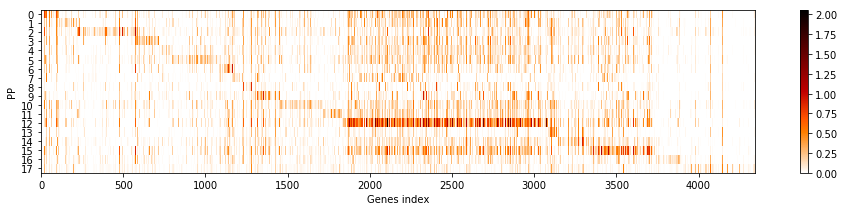

In [153]:
plt.figure(figsize=(16,3))
plt.imshow(D_sorted.T,interpolation='nearest', aspect='auto',cmap='gist_heat_r')
plt.yticks(np.arange(0,18))
plt.ylabel('PP')
plt.xlabel('Genes index')
plt.colorbar()

In [ ]:
p2 = np.reshape(A[i,:], original_shape[1:])
plt.imshow(np.mean(p2,axis=2).T)
plt.axis('off')
plt.text(1,3,'Factor: '+str(i),fontsize=16, color='w')
plt.show()
factors[i,:,:,:] = p2

In [161]:
D.shape

(4345, 18)

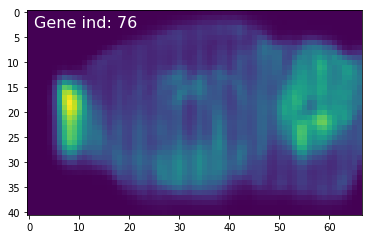

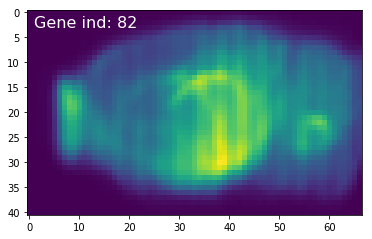

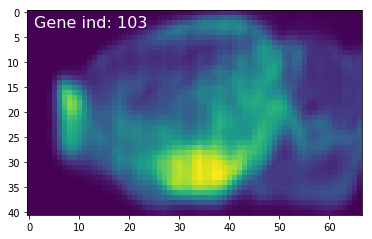

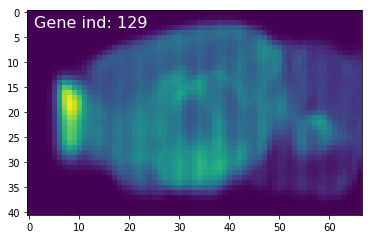

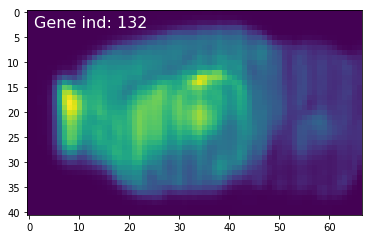

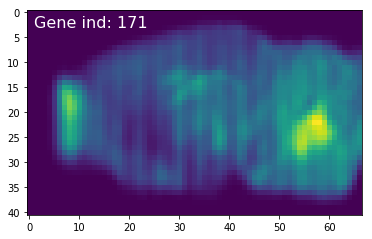

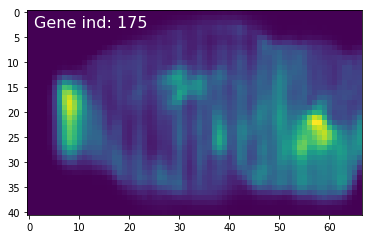

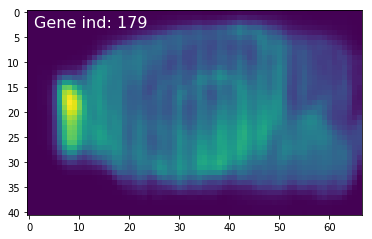

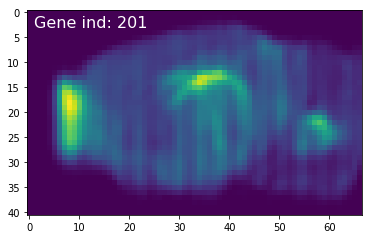

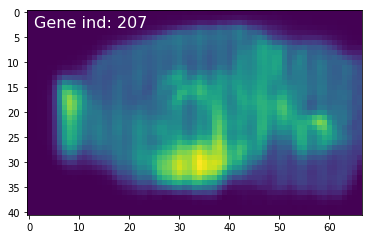

In [163]:
gene_per_pp = np.where(np.argmax(D,axis=1)==16)[0]
for gene_ind in gene_per_pp[0:10]:
    p2 = np.reshape(np.matmul(D[gene_ind,:],A), original_shape[1:])
    plt.imshow(np.mean(p2,axis=2).T)
    plt.text(1,3,'Gene ind: '+str(gene_ind),fontsize=16, color='w')
    plt.show()


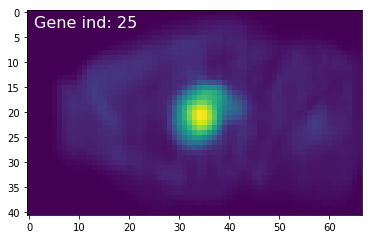

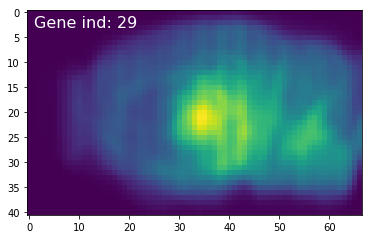

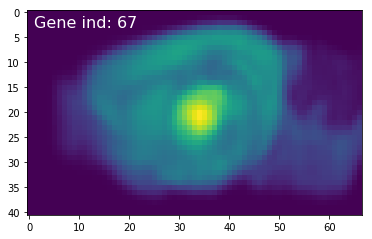

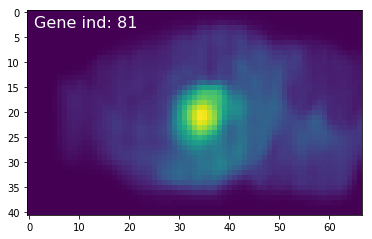

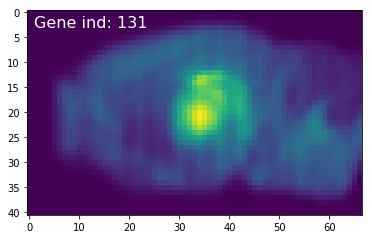

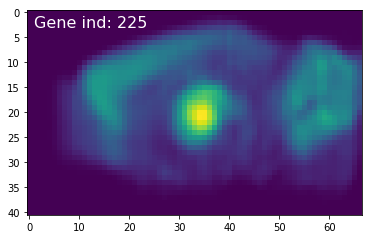

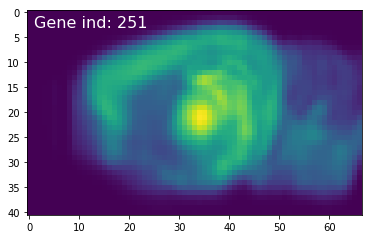

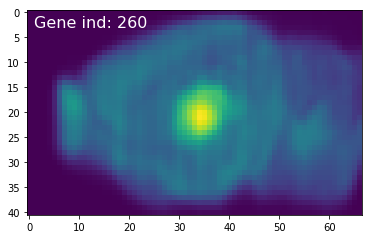

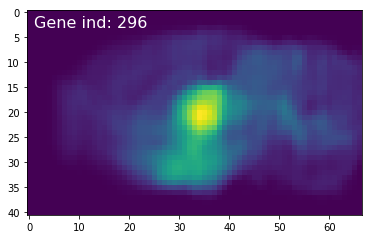

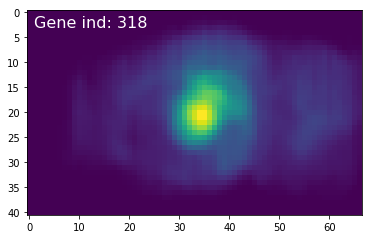

In [164]:
gene_per_pp = np.where(np.argmax(D,axis=1)==11)[0]
for gene_ind in gene_per_pp[0:10]:
    p2 = np.reshape(np.matmul(D[gene_ind,:],A), original_shape[1:])
    plt.imshow(np.mean(p2,axis=2).T)
    plt.text(1,3,'Gene ind: '+str(gene_ind),fontsize=16, color='w')
    plt.show()



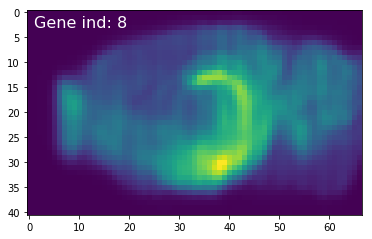

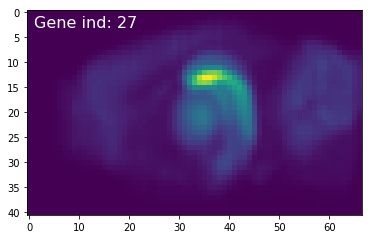

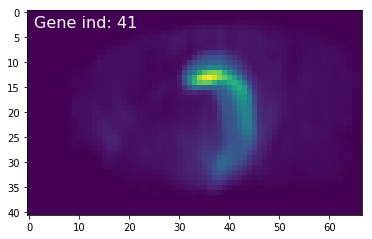

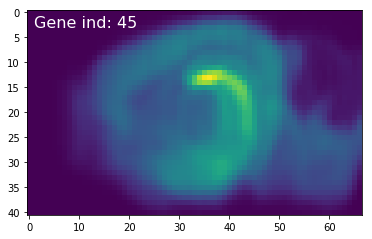

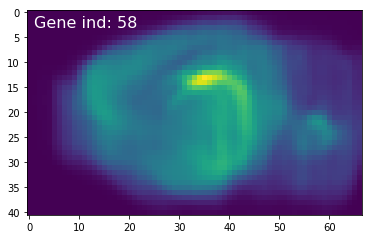

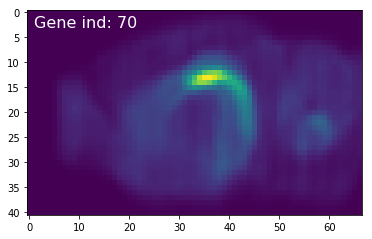

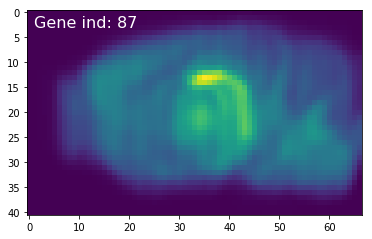

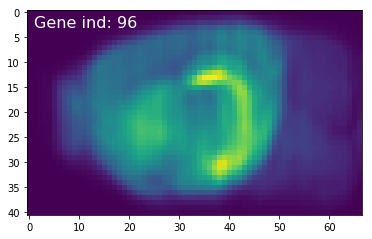

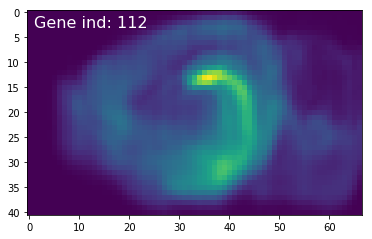

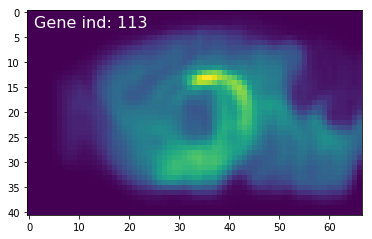

In [165]:
gene_per_pp = np.where(np.argmax(D,axis=1)==5)[0]
for gene_ind in gene_per_pp[0:10]:
    p2 = np.reshape(np.matmul(D[gene_ind,:],A), original_shape[1:])
    plt.imshow(np.mean(p2,axis=2).T)
    plt.text(1,3,'Gene ind: '+str(gene_ind),fontsize=16, color='w')
    plt.show()




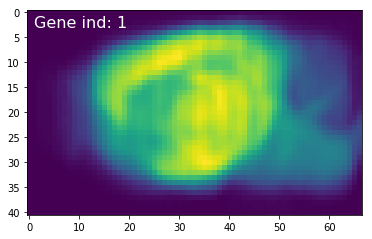

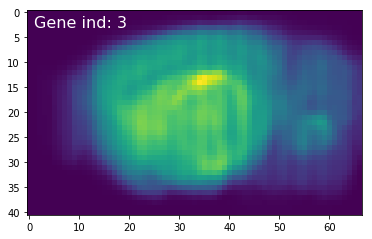

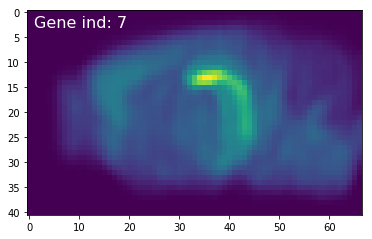

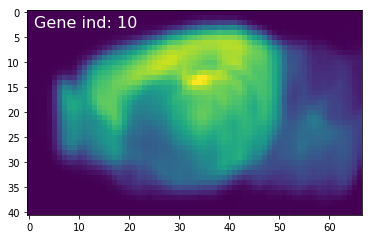

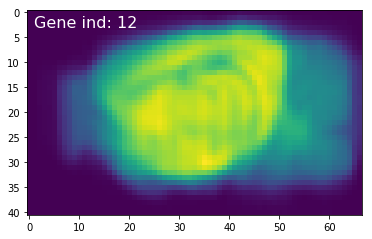

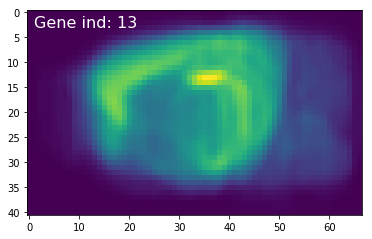

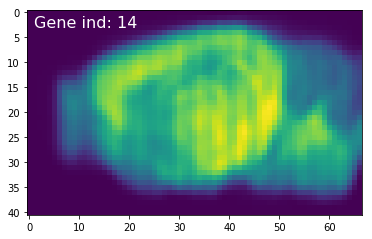

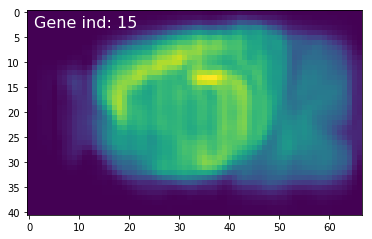

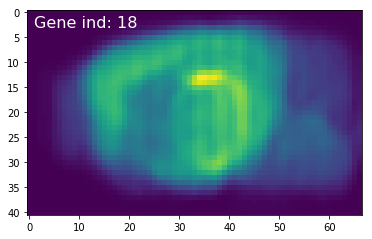

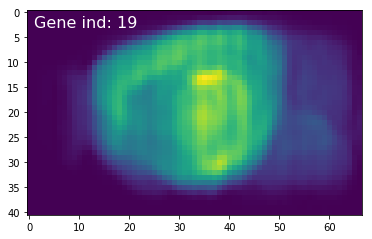

In [166]:
gene_per_pp = np.where(np.argmax(D,axis=1)==12)[0]
for gene_ind in gene_per_pp[0:10]:
    p2 = np.reshape(np.matmul(D[gene_ind,:],A), original_shape[1:])
    plt.imshow(np.mean(p2,axis=2).T)
    plt.text(1,3,'Gene ind: '+str(gene_ind),fontsize=16, color='w')
    plt.show()




# fraction of common genes as PP distance

In [171]:
import scipy as sp

In [208]:
D_cube = A.reshape([18] + list(original_shape[1:])) # transform the vector to 3d tensor
assert np.allclose(D_cube[0,:], A[0, :].reshape(original_shape[1:]))
distance = np.zeros((18, 18))

# Step 1: select the top voxels for each PP
set_of_vectors = dict()
for i in range(18):
    threshold = np.quantile(D_cube[i,:,:,:].flatten(), .99)
    set_of_vectors[i] =  np.array([(x,y,z) for x in range(D_cube.shape[1]) for y in range(D_cube.shape[2]) for z in range(D_cube.shape[3]) if D_cube[i,x,y,z] > threshold])
    
# Step 2: compute the set distance
for i in range(18):
    for j in range(i+1,18):
        Y = sp.spatial.distance.cdist(set_of_vectors[i], set_of_vectors[j], metric='euclidean')
        distance[i][j] = np.mean(Y.flatten())
        #print(i,j, distance[i][j])

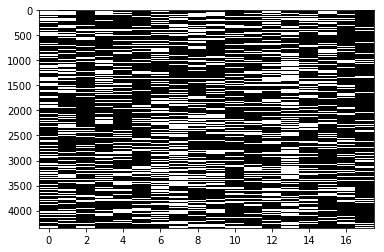

In [209]:
plt.imshow(np.sign(D),interpolation='nearest', aspect='auto',cmap='gist_heat_r')

In [210]:
PP_similarity = np.zeros((18, 18))
for i in range(18):
    for j in range(i+1,18):
        PP_similarity[i][j] = sklearn.metrics.jaccard_similarity_score(np.sign(D[:,i]),np.sign(D[:,j]))
        #print(i,j, distance[i][j])
PP_similarity[np.where(PP_similarity==0)]=np.nan

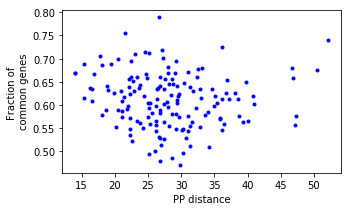

In [221]:
plt.figure(figsize=(5,3))
plt.plot(distance.flatten(), PP_similarity.flatten(),'b.')
plt.axis='off'
plt.xlabel('PP distance')
plt.ylabel('Fraction of \ncommon genes')
plt.show()


In [253]:
gene_id_targets

['Inpp5a']

In [ ]:
target_id = gene_ids[0]
gene_ids = np.array(list(sections.keys())) 

# find the gene_id of the target gene
gene_id_targets = [name for x, name in sections.items() if x == target_id]
gene_id_target = 0 
for gene_id in sections:    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if sections[gene_id] == target_gene:
        gene_id_target = gene_id
        
        
# find the gene index
gene_ind = np.where(gene_ids == gene_id_target)[0][0]
print("the index of the gene {} is {}".format(target_gene, gene_ind))



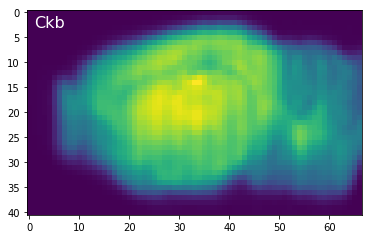

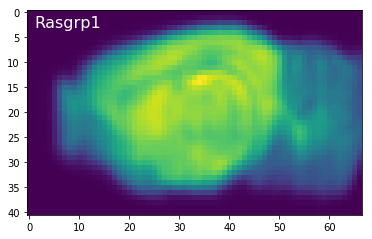

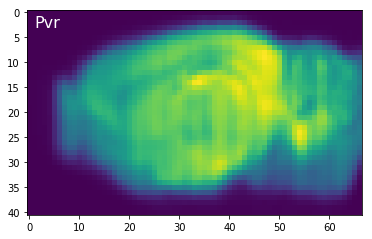

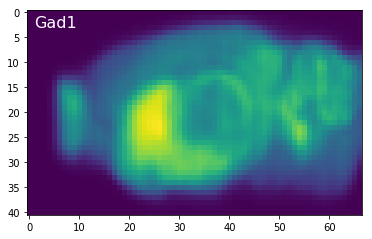

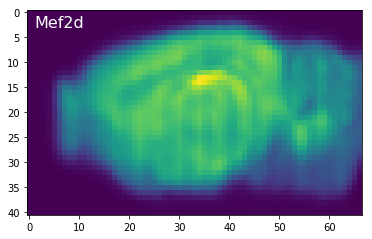

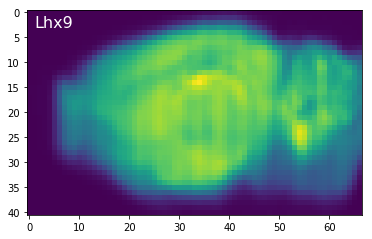

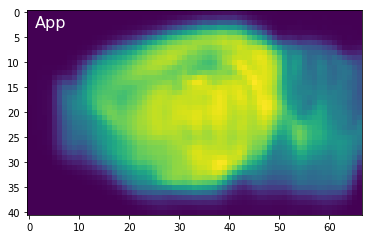

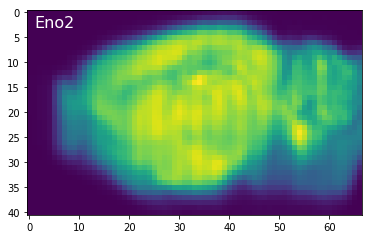

In [259]:
pp_thresh = .4
gene_per_pp = np.where(np.logical_and(D[:,2]>pp_thresh, D[:,16]>pp_thresh))[0]
for gene_ind in gene_per_pp:
    p2 = np.reshape(np.matmul(D[gene_ind,:],A), original_shape[1:])
    plt.imshow(np.mean(p2,axis=2).T)
    plt.text(1,3,[name for x, name in sections.items() if x ==  gene_ids[gene_ind]][0],fontsize=16, color='w')
    plt.show()




# Voxel overlap

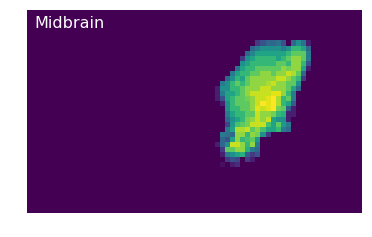

In [9]:
for i in range(1):
    plt.imshow(np.mean(areas_atlas[i,:,:,:],axis=2).T)
    plt.axis('off')
    plt.text(1,3,(mouse_coarse_df.iloc[i]['name']),fontsize=16, color='w')
    plt.show()

In [33]:
n_PP = 18
PP_quant_all = np.zeros(([n_PP,original_shape[1],original_shape[2],original_shape[3]]))
for pp_ind in range(n_PP):
    PP_rec = np.reshape(np.matmul(D[pp_ind,:],A), original_shape[1:])
    threshold = np.quantile(PP_rec.flatten(), .99)
    PP_quant_all[pp_ind,:,:,:] = PP_rec>threshold

In [36]:
# for i in range(n_PP):
#     plt.imshow(np.mean(PP_quant_all[i,:,:,:],axis=2).T)
#     plt.text(1,3,('PP'+np.str(i)),fontsize=16, color='w')
#     plt.show()

In [42]:
print(np.sum(PP_quant_all[0,:,:,:]))
print(np.sum(areas_atlas[0,:-1,:-1,:-1]))
print(np.sum(np.logical_and(PP_quant_all[0,:,:,:],areas_atlas[0,:,:,:])))

1594.0
4601.0


ValueError: operands could not be broadcast together with shapes (67,41,58) (65,39,56) 